# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import inspect

print(inspect.signature(UnityEnvironment))

(file_name=None, worker_id=0, base_port=5005, curriculum=None, seed=0, docker_training=False, no_graphics=False)


In [2]:
env = UnityEnvironment(file_name=r"C:\Users\Bondi\Documents\Home\Work\reinforcementLearning\deep-reinforcement-learning\p1_navigation\Banana_Windows_x86_64\Banana.exe", 
					   worker_id=0,seed=1)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [0.         1.         0.         0.         0.27946243 0.
 1.         0.         0.         0.74556106 0.         0.
 1.         0.         0.48277503 0.         1.         0.
 0.         0.30341193 0.         0.         1.         0.
 0.46494457 0.         0.         1.         0.         0.08466676
 0.         1.         0.         0.         0.95967758 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [4]:
if (False):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    k = 0
    while k<100:
        k = k+1
        action = np.random.randint(action_size)        # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
        
    print("Score: {}".format(score))

    env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from dqn_agent import Agent

agent = Agent(state_size=37, action_size=4, seed=0)

env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

if (False):
    while True: # episode lasts 300 actions?
        #action = np.random.randint(action_size)        # select an action (agent.act(state))
        action = agent.act(state)
        env_info = env.step(int(action))[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break

    print("Score: {}".format(score))

In [6]:
from collections import deque
import torch


def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    f = open('log_training_p1navigation.csv','w')
    scores = []                        # list containing scores from each episode
    mean_score = 0
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            # <<step environment
            env_info = env.step(int(action))[brain_name]        
            next_state = env_info.vector_observations[0]   
            reward = env_info.rewards[0]                   
            done = env_info.local_done[0]                  
            # /step environment>>
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 

        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        last_mean_score = mean_score
        mean_score = float(np.max([mean_score, np.mean(scores_window)]))
        if (mean_score > last_mean_score):
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_best.pth')


        f.write("%.4f, %.4f\n" % (score, np.mean(scores_window)))
        f.flush()
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'temp_checkpoint.pth')
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
    f.close()
    return scores

scores = dqn()

Episode 100	Average Score: 0.84
Episode 200	Average Score: 4.47
Episode 300	Average Score: 7.89
Episode 400	Average Score: 10.33
Episode 500	Average Score: 11.95
Episode 560	Average Score: 13.00
Environment solved in 460 episodes!	Average Score: 13.00
Episode 561	Average Score: 13.07
Environment solved in 461 episodes!	Average Score: 13.07
Episode 562	Average Score: 13.04
Environment solved in 462 episodes!	Average Score: 13.04
Episode 563	Average Score: 13.11
Environment solved in 463 episodes!	Average Score: 13.11
Episode 564	Average Score: 13.12
Environment solved in 464 episodes!	Average Score: 13.12
Episode 565	Average Score: 13.27
Environment solved in 465 episodes!	Average Score: 13.27
Episode 566	Average Score: 13.29
Environment solved in 466 episodes!	Average Score: 13.29
Episode 567	Average Score: 13.31
Environment solved in 467 episodes!	Average Score: 13.31
Episode 568	Average Score: 13.30
Environment solved in 468 episodes!	Average Score: 13.30
Episode 569	Average Score: 1

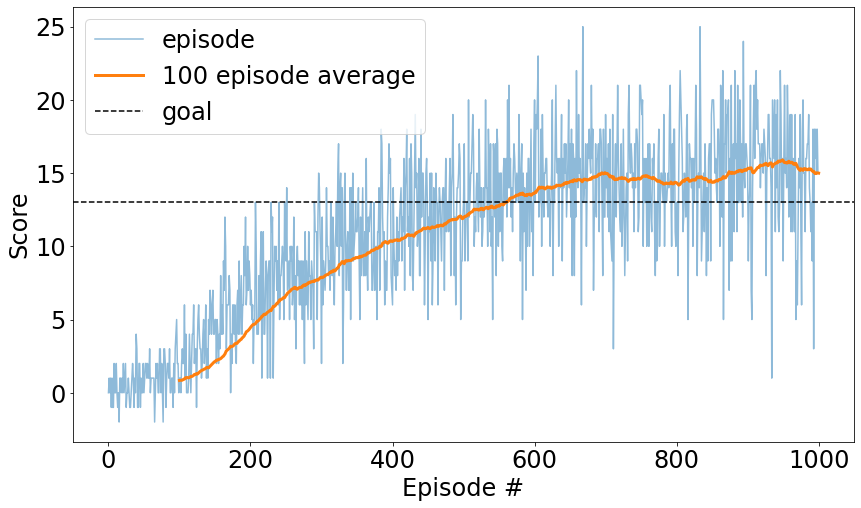

In [24]:
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

N = 100;
x = scores
xfilter = np.convolve(x, np.ones(N)/N, mode='valid')

# plot the scores
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='episode', alpha=0.5)
plt.plot(np.arange(len(xfilter))+N, xfilter, label='100 episode average', linewidth=3)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.axhline(13, color='k', linestyle='--', label='goal')
plt.legend()
plt.show()

#### See the trained agent in action

In [25]:

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

while True: # episode lasts 300 actions?
    #action = np.random.randint(action_size)        # select an action (agent.act(state))
    action = agent.act(state)
    env_info = env.step(int(action))[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break

#env.close()
print("Score: {}".format(score))

UnityEnvironmentException: No Unity environment is loaded.

In [9]:
env.close()